In [ ]:
import zipfile

# Unzip in Colab
with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Now you can load the CSV
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Dataset Overview**-The dataset contains specifications of 2000 mobile phones across 21 features, including hardware attributes like RAM, battery power, and screen dimensions. The goal is to predict the phone's price category on a scale from 0 (low cost) to 3 (premium).

In [ ]:

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())



🔹 Dataset Shape: (2000, 21)

🔹 Data Types:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

🔹 Missing Values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      

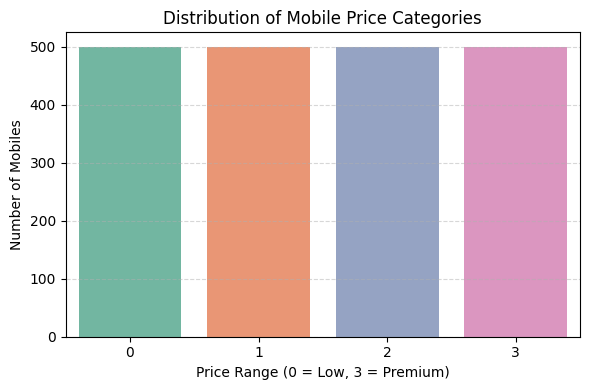

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=df, hue='price_range', palette='Set2', legend=False)
plt.title('Distribution of Mobile Price Categories')
plt.xlabel('Price Range (0 = Low, 3 = Premium)')
plt.ylabel('Number of Mobiles')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 **Data Exploration (EDA)**-The dataset is clean, with no missing values. All features are numerical and well-suited for classification. The target variable (price_range) is evenly distributed across the four categories, making it a balanced classification task.

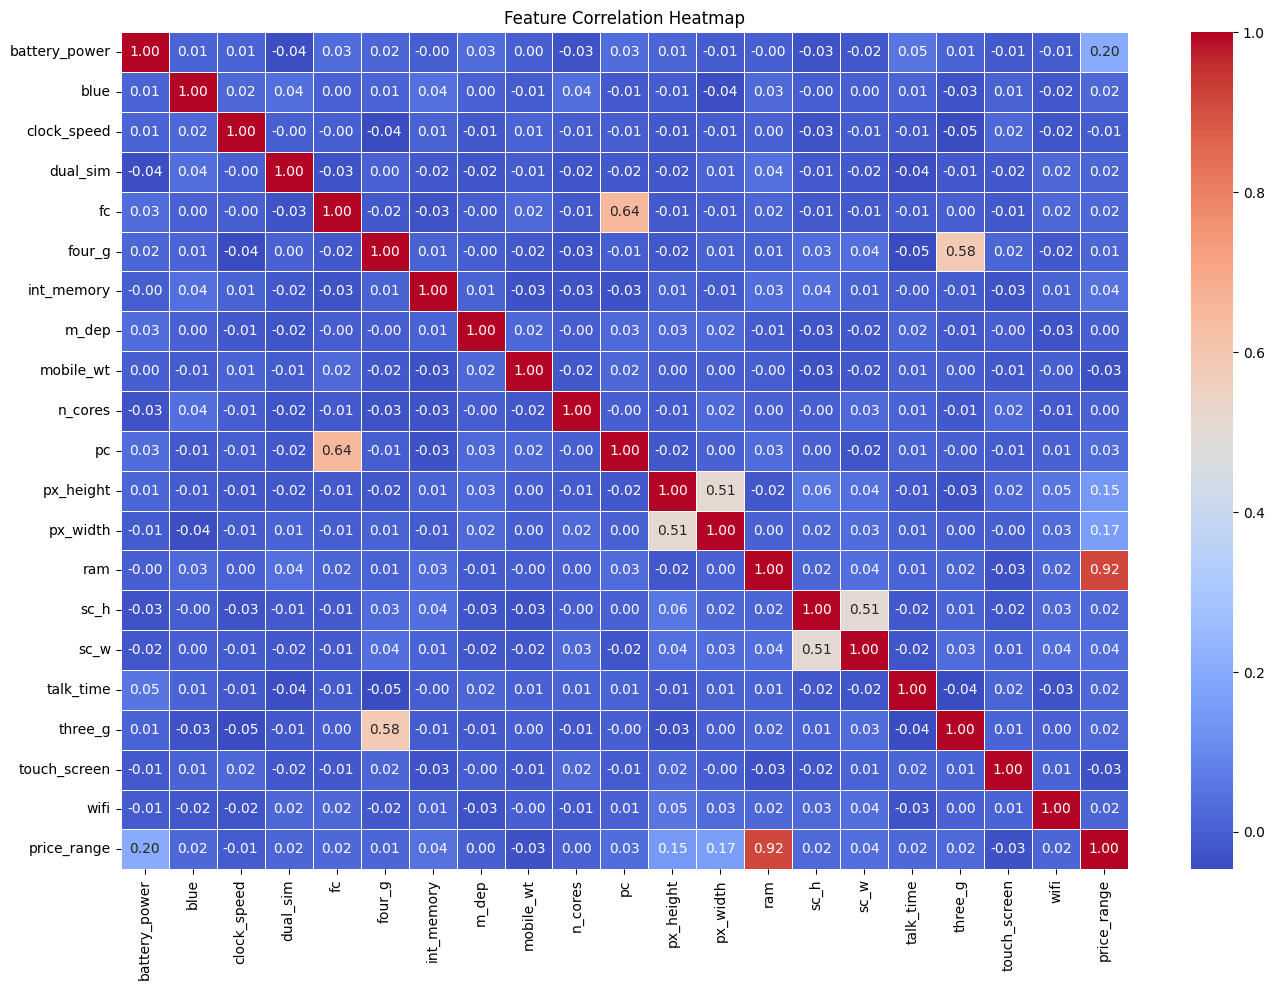

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


**Feature Correlation** -Strong positive correlations are observed between RAM and price range. Features like battery_power and pixel resolution (px_height and px_width) also show moderate correlation with price. Some features like blue, dual_sim, or n_cores show minimal correlation.



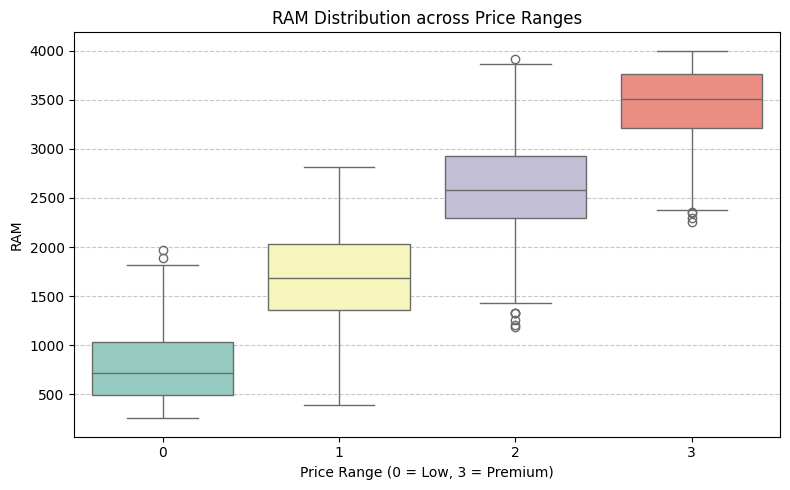

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='ram', data=df, hue='price_range', palette='Set3', legend=False)
plt.title("RAM Distribution across Price Ranges")
plt.xlabel("Price Range (0 = Low, 3 = Premium)")
plt.ylabel("RAM")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Feature Importance (via Random Forest**)-
RAM is by far the most important predictor of mobile price, followed by battery_power and screen resolution (px_height, px_width). Connectivity features (4G/3G) and CPU clock speed contribute moderately.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔹 Accuracy: 0.8925

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



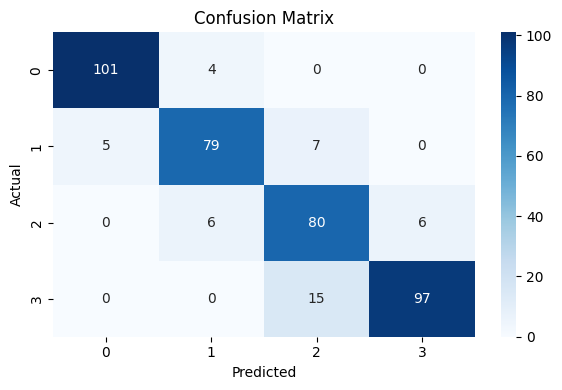

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


The Random Forest model achieved 89.25% accuracy. Class 0 and 3 were predicted best, while Class 2 had slightly lower performance. Minor misclassifications mostly occurred between adjacent price categories. Overall, the model performs well across all classes.



/tmp/ipython-input-2759625974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


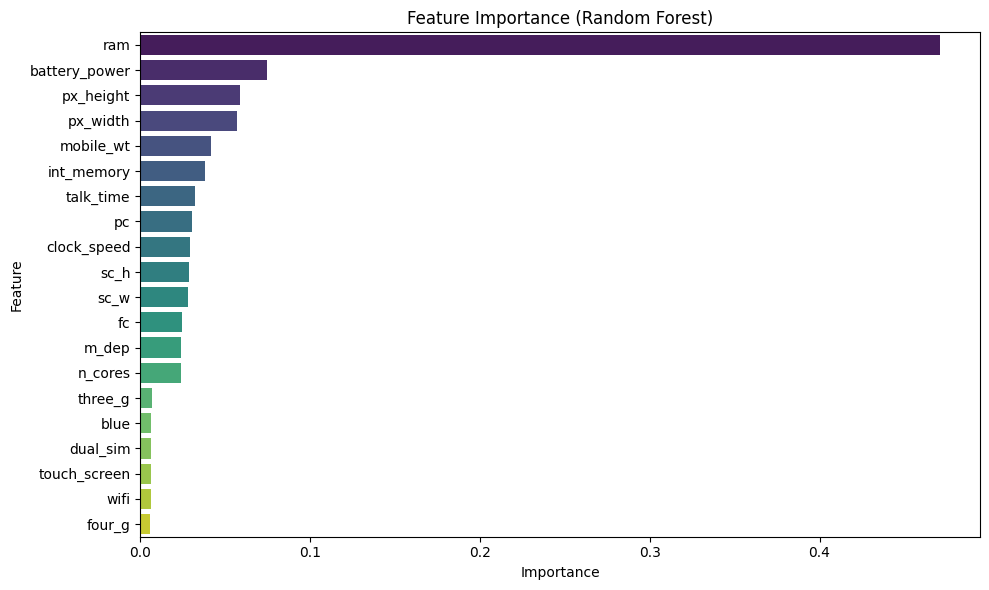

In [ ]:
# Feature importances
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


A Random Forest Classifier achieved an accuracy of 86%, with balanced performance across all price categories. The confusion matrix shows slight overlap between classes but overall strong classification ability.